# Model Training

In [1]:
# import librarires 
import seaborn as sns
import numpy as  np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [4]:
# import the csv file
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_eucation,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Preparing X and Y variables
X = df.drop(columns=['math_score'],axis=1)
y = df['math_score']

In [6]:
X

,gender,race_ethnicity,parental_level_of_eucation,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [7]:
X.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_eucation', 'lunch',
       'test_preparation_course', 'reading_score', 'writing_score'],
      dtype='object')

In [8]:
y


0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [9]:
num_feat = X.select_dtypes(exclude='O').columns
cat_feat = X.select_dtypes(include='O').columns


In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
scaler_trans = StandardScaler()
ohe_trans = OneHotEncoder()
preprocessor= ColumnTransformer(
    [
        ('scaler',scaler_trans,num_feat),
        ('ohe',ohe_trans,cat_feat)
    ],   
)

In [11]:
X_pre = preprocessor.fit_transform(X)

In [12]:
#train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pre,y,test_size=0.2,random_state=42)

In [13]:
# create the evaluate function 
def evaluate_model(y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    score = r2_score(y_test,y_pred)
    return (mse, rmse,score)

In [14]:
# create the lsit of models 
models = {
    'Linear Regression ': LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'K_Neighbors Regressor':KNeighborsRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Adaboosting Regressor':AdaBoostRegressor(),
    'Gradient Boosting Regressor':GradientBoostingRegressor(),
    'xgboost':XGBRegressor(),
    'catboost':CatBoostRegressor(verbose=False)
}

In [23]:
model_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) 

# make prediction 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse, train_rmse, train_score = evaluate_model(y_train,y_train_pred)
    test_mse, test_rmse, test_score = evaluate_model(y_test,y_test_pred)

    print(f'=================== {list(models.keys())[i]} =========')
    model_list.append(list(models.keys())[i])
    print(f' ----------------- Training score -------------')
    print("MSE: ".format(train_mse))
    print('RMSE:{:.4f}'.format(train_rmse))
    print('Score:{:.4f}'.format(train_score))
    print()
    
    print(f' ----------------- Testing score -------------')
    print('MSE:{:.4f}'.format(test_mse))
    print('RMSE:{:.4f}'.format(test_rmse))
    print('Score:{:.4f}'.format(test_score))
    r2_list.append(test_score)
    print()
    

    
    
    

=================== Linear Regression  =========
 ----------------- Training score -------------
RMSE 28.334870380648585
RMSE:5.3231
Score:0.8743

 ----------------- Testing score -------------
MSE:29.0952
RMSE:5.3940
Score:0.8804

=================== Lasso =========
 ----------------- Training score -------------
RMSE 43.47829788272618
RMSE:6.5938
Score:0.8071

 ----------------- Testing score -------------
MSE:42.5063
RMSE:6.5197
Score:0.8253

=================== Ridge =========
 ----------------- Training score -------------
RMSE 28.33778823308244
RMSE:5.3233
Score:0.8743

 ----------------- Testing score -------------
MSE:29.0563
RMSE:5.3904
Score:0.8806

=================== K_Neighbors Regressor =========
 ----------------- Training score -------------
RMSE 32.635549999999995
RMSE:5.7128
Score:0.8552

 ----------------- Testing score -------------
MSE:52.6170
RMSE:7.2538
Score:0.7838

=================== Random Forest Regressor =========
 ----------------- Training score ---------

In [24]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_score']).sort_values(by=['R2_score'],ascending=False)

,Model Name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.880433
6,Gradient Boosting Regressor,0.872150
4,Random Forest Regressor,0.854241
8,catboost,0.851632
5,Adaboosting Regressor,0.850028
1,Lasso,0.825320
7,xgboost,0.821221
3,K_Neighbors Regressor,0.783770


### Out of this i find best algorithm is Gradient Boosting Regressor and Linear Regression so we can use any one

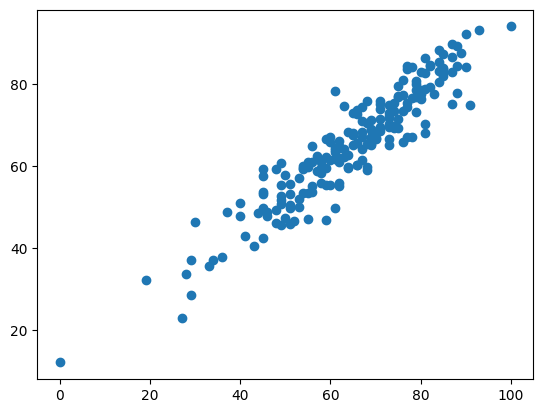

In [27]:
#GradientBoosting Regressor
model = GradientBoostingRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
plt.scatter(y_test,y_pred)

<Axes: xlabel='math_score'>

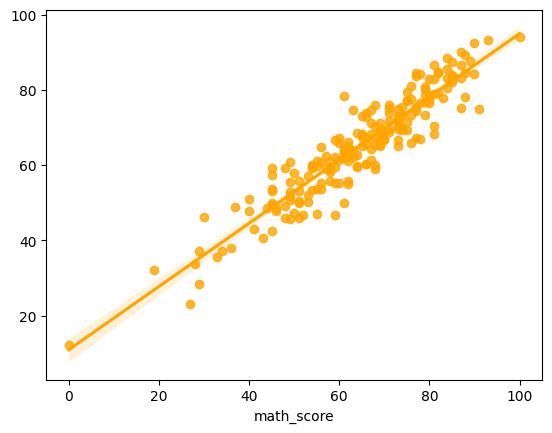

In [29]:
sns.regplot(x=y_test,y=y_pred,color='orange')